### Import des librairies

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.lines as mlines
import seaborn as sns
import scipy.stats as st
from scipy.stats import pearsonr
import datetime

## Import des données et prétraitement

Import du fichier "transactions"

In [2]:
transactions = pd.read_csv(r'C:\Users\serha\Desktop\Formation Data Analyste\P6_Kus_Serhat V\transactions.csv')
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [3]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [4]:
#voir si il y'a des NAn
print(transactions.isnull().sum())

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64


On peut voir qu'il n'y a pas de NAn pour chaque colonne de "transactions"

Import du fichier "products"

In [5]:
products = pd.read_csv(r'C:\Users\serha\Desktop\Formation Data Analyste\P6_Kus_Serhat V\products.csv')
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [6]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [7]:
print(products.isnull().sum())

id_prod    0
price      0
categ      0
dtype: int64


Il n'y a pas de NAn pour chaque colonne de "products"

Import du fichier "customers"

In [8]:
customers = customers = pd.read_csv(r'C:\Users\serha\Desktop\Formation Data Analyste\P6_Kus_Serhat V\customers.csv')
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [9]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [10]:
print(customers.isnull().sum())

client_id    0
sex          0
birth        0
dtype: int64


Il n'y a pas de NAn pour chaque colonne de "customers"

## Détéction des outliers 

Ici on va détécter les outliers des prix de la dataframe "products"

In [11]:
#Code pour avoir la liste des prix
price = products['price']
price = sorted(price)

In [12]:
q1,q3 = np.percentile(price,[25,75])
q1,q3

(6.99, 22.99)

In [13]:
interq = q3-q1
interq

15.999999999999998

In [14]:
val_max = max(price)
val_max

300.0

In [15]:
val_min = min(price)
val_min

-1.0

Ici on peut voir qu'il y'a une valeur négative, alors qu'on est censé avoir des prix, or un prix ne peut être négatif
On va verifier ces calculs avec les calculs des bornes 

In [16]:
upper_bound = q3 + (1.5 * interq)
upper_bound

46.989999999999995

In [17]:
lower_bound = q1 - (1.5 * interq)
lower_bound

-17.009999999999998

In [18]:
outliers = [x for x in price if x >= upper_bound or x <= lower_bound]
print("Il y a ", len(outliers),"outliers ")

Il y a  302 outliers 


Représentons ces outliers sur une boîte à moustache

{'whiskers': [<matplotlib.lines.Line2D at 0x1699af09a00>,
 'caps': [<matplotlib.lines.Line2D at 0x1699b4a6100>,
 'boxes': [<matplotlib.lines.Line2D at 0x1699af096a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1699b4a67c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1699b4a6b20>],
 'means': []}

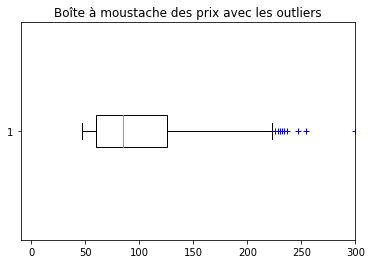

In [19]:
plt.xlim(-10,300)
plt.title("Boîte à moustache des prix avec les outliers")
plt.boxplot(outliers, sym='b+', vert = False)

On voit donc les valeurs supérieurs à la borne supérieur ici, mais on ne peut pas les supprimer car ce sont peut être de grandes valeurs, mais elles ne sont pas fausses.

Il n'y a pas de valeurs inférieur à la borne inférieur, cependant il y'a une valeur négative qui est fausse (valeur mini). On va s'approcher de cette valeur

In [20]:
val_negative=products[products['price'] < 0]
val_negative

,id_prod,price,categ
731,T_0,-1.0,0


In [21]:
products.shape

(3287, 3)

Ici on a donc la ligne où l'id_prod est T_0 qui est sûrement une donnée test fait par les développeurs. Grâce au prix négatif
on peut donc supprimer cette ligne.

In [22]:
products.drop(731,inplace= True)

In [23]:
products.shape

(3286, 3)

La ligne est donc bien supprimée.

J'ai remarqué qu'il y'a des lignes "test" dans la table transactions, je vais m'en approcher

In [24]:
transactions.shape

(679532, 4)

In [25]:
lignes_test = transactions[transactions['id_prod'] == 'T_0']
lignes_test

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


Ici nous avons donc toutes les lignes test dans la table transactions, je les juges inutile donc je vais les supprimer.

En passant l'id_prod en index, c'est plus simple de supprimer les données "test".

In [26]:
transactions.set_index("id_prod", inplace= True)

In [27]:
transactions.drop(index="T_0", inplace= True)

Il y'a bien 200 lignes d'écart entre le moment où j'ai enlevé les lignes test et juste avant les avoir supprimées

In [28]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 679332 entries, 0_1518 to 1_523
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        679332 non-null  object
 1   session_id  679332 non-null  object
 2   client_id   679332 non-null  object
dtypes: object(3)
memory usage: 20.7+ MB


On peut voir que la colonne "date" est de type objet, il faut le mettre en format date

In [29]:
transactions['date'] = pd.to_datetime(transactions['date'])

In [30]:
transactions

,date,session_id,client_id
id_prod,,,
0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...
0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
0_1425,2022-12-20 04:33:37.584749,s_314704,c_304


Les client_id "ct_0" et "ct_1" étant des clients test je vais les supprimer de la table customers en passant la colonne client_id en index

In [31]:
customers.set_index("client_id", inplace = True)

In [32]:
customers.shape

(8623, 2)

In [33]:
customers.drop(index = (['ct_0','ct_1']))

,sex,birth
client_id,,
c_4410,f,1967
c_7839,f,1975
c_1699,f,1984
c_5961,f,1962
c_5320,m,1943
...,...,...
c_7920,m,1956
c_7403,f,1970
c_5119,m,1974


Les 2 clients test sont donc supprimées

## Demandes d'Antoine

### Jointures

In [34]:
transaction_product_out = pd.merge(transactions, products, on='id_prod',how = 'outer', indicator= True)
transaction_product_out['_merge'].unique()

['both', 'left_only', 'right_only']
Categories (3, object): ['both', 'left_only', 'right_only']

In [35]:
transaction_product_inn = pd.merge(transactions, products, on='id_prod',how = 'inner', indicator= True)
transaction_product_inn['_merge'].unique()

['both']
Categories (1, object): ['both']

In [36]:
transaction_product_left = pd.merge(transactions, products, on='id_prod',how = 'left', indicator= True)
transaction_product_left['_merge'].unique()

['both', 'left_only']
Categories (2, object): ['both', 'left_only']

In [37]:
transaction_product_right = pd.merge(transactions, products, on='id_prod',how = 'right', indicator= True)
transaction_product_right['_merge'].unique()

['both', 'right_only']
Categories (2, object): ['both', 'right_only']

In [38]:
transaction_product = pd.merge(transactions, products, on='id_prod',how = 'inner')

Après avoir tester tous les types de jointures, on peut voir que la seule jointure avec "both" pour chaque "_merge" est le inner, je vais donc utiliser ce type de jointure pour avoir une bonne table. On prend uniquement les produits déjà achetés

In [39]:
transaction_product.head()

,id_prod,date,session_id,client_id,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0
1,0_1518,2021-09-26 12:37:29.780414,s_95811,c_6197,4.18,0
2,0_1518,2021-05-06 17:14:43.117440,s_30782,c_682,4.18,0
3,0_1518,2022-03-16 18:57:10.420103,s_180057,c_5932,4.18,0
4,0_1518,2022-11-12 18:58:10.574853,s_296584,c_7217,4.18,0


In [40]:
transaction_final_out = pd.merge(transaction_product, customers, on='client_id',how = 'outer', indicator= True)
transaction_final_out['_merge'].unique()

['both', 'right_only']
Categories (2, object): ['both', 'right_only']

In [41]:
transaction_final_inn = pd.merge(transaction_product, customers, on='client_id',how = 'inner', indicator= True)
transaction_final_inn['_merge'].unique()

['both']
Categories (1, object): ['both']

In [42]:
transaction_final_right = pd.merge(transaction_product, customers, on='client_id',how = 'right', indicator= True)
transaction_final_right['_merge'].unique()

['both', 'right_only']
Categories (2, object): ['both', 'right_only']

In [43]:
transaction_final_left = pd.merge(transaction_product, customers, on='client_id',how = 'left', indicator= True)
transaction_final_left['_merge'].unique()

['both']
Categories (1, object): ['both']

In [44]:
transaction_final = pd.merge(transaction_product, customers, on='client_id',how = 'inner')

In [45]:
transaction_final.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0,f,1986
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4.18,0,f,1986
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4.18,0,f,1986
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,8.57,0,f,1986
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,8.57,0,f,1986


Dans un premier temps on aura le chiffre d'affaire moyen par catégorie avec le graphique qui va avec. Ensuite on aura l'évolution du chiffre d'affaire dans le temps avec la décomposition en moyenne mobile, les tops et les flops des références ainsi que la répartition par catégorie, et pour finir la répartition du chiffre d'affaire entre les clients. 

### Chiffre d'affaire par catégorie

Pour chaque chiffre d'affaire j'ai utilisé un groupby

In [46]:
chiffre_affaire_tot = transaction_final['price'].sum()
print(chiffre_affaire_tot)

11853728.680000007


In [47]:
pd.set_option('display.float_format', lambda x: '%0.0f' % x)
ca_cat = transaction_final[['price','categ']].groupby('categ').sum()
ca_cat.sort_values(by='categ', ascending=False).head()

,price
categ,
2,2780275
1,4653723
0,4419731


<AxesSubplot:ylabel='price'>

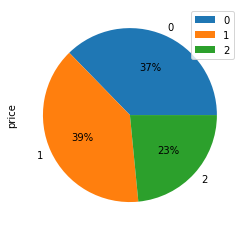

In [48]:
ca_cat.plot(kind='pie', y='price',autopct='%1.0f%%')

On peut voir ici que la catégorie 0 et la catégorie 1 sont celles avec les plus gros chiffre d'affaire des 3 caégories, la catégorie 1 est quant à elle supérieur (de peu) à la catégorie 0 et  supérieur à la catégorie 2(qui est sûrement la plus chère)

### Chiffre d'affaire par genre

In [49]:
ca_genre = round(transaction_final[['price','sex']].groupby('sex').sum()*transaction_final[['price','sex']].groupby('sex').count())
ca_genre.sort_values(by='sex', ascending=False).head()

,price
sex,
m,2042926568633
f,1982242907640


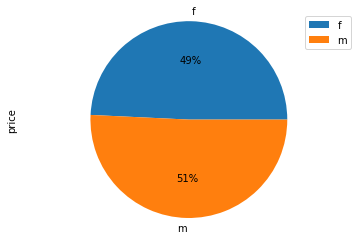

In [50]:
ca_genre.plot(kind = 'pie', subplots = True, autopct='%1.0f%%')
plt.axis('equal')
plt.show()

Ici, il y'a une légère différence entre le chiffre d'affaire des hommes et des femmes, on voit que le chiffre d'affaire des hommes est un tout petit peu au dessus 

### Chiffre d'affaire par âge

Pour avoir l'âge il faut tout simplement soustraire l'année actulle et l'année de naissance

In [51]:
transaction_final['age'] = 2022 - transaction_final['birth']
transaction_final.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4,0,f,1986,36
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,4,0,f,1986,36
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,4,0,f,1986,36
3,0_1418,2022-06-18 01:49:37.823274,s_225411,c_103,9,0,f,1986,36
4,0_1418,2021-08-18 01:49:37.823274,s_77214,c_103,9,0,f,1986,36


In [52]:
ca_age = (transaction_final[['price','age']].groupby('age').sum()*transaction_final[['price','age']].groupby('age').count())
ca_age.sort_values(by='age', ascending=True).head()

,price
age,
18,9225948390
19,778893754
20,844268972
21,758972220
22,728180216


<AxesSubplot:title={'center':'CA par age'}, xlabel='age'>

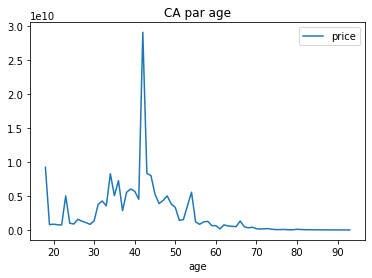

In [53]:
ca_age.plot(title = 'CA par age')

Ici, on voit bien l'évolution du chiffre d'affaire, on peut surtout voir que les meilleurs chiffres se font entre 40 et 45 ans.
On voit un pic d'évolution vers 41 ans.

### Chiffre d'affaire dans le  temps

In [54]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [55]:
import plotly.express as px

transaction_group=transaction_final.groupby(["price",pd.Grouper(key='date', freq='M')]).sum()

transaction_group=transaction_group.reset_index()

In [56]:
transaction_group[ '7day_rolling_avg' ] = transaction_group.price.rolling( 7).mean() 
transaction_group.head(10)

,price,date,categ,birth,age,7day_rolling_avg
0,1,2021-03-31,0,1976,46,NaN
1,1,2021-04-30,0,1975,47,NaN
2,1,2021-05-31,0,5880,186,NaN
3,1,2021-06-30,0,3977,67,NaN
4,1,2021-08-31,0,1984,38,NaN
5,1,2021-10-31,0,7920,168,NaN
6,1,2022-01-31,0,3972,72,1
7,1,2022-06-30,0,1988,34,1
8,1,2022-08-31,0,1959,63,1
9,1,2022-09-30,0,1975,47,1


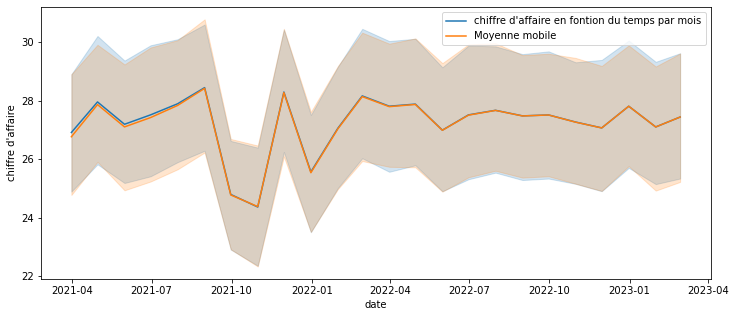

In [57]:
plt.figure( figsize = ( 12, 5)) 
  
sns.lineplot( x = 'date', 
             y = 'price', 
             data =transaction_group, 
             label = "chiffre d'affaire en fontion du temps par mois") 
  
sns.lineplot( x = 'date', 
             y = '7day_rolling_avg', 
             data = transaction_group, 
             label = 'Moyenne mobile') 
  
plt.xlabel('date') 
plt.ylabel("chiffre d'affaire") 
plt.show()

Sur ce graphique on peut voir les pics, et surtout que le chiffre d'affaire a baissé en octobre 2021

In [58]:
transaction_group=transaction_final.groupby(["price",pd.Grouper(key='date', freq='D')]).sum()

transaction_group=transaction_group.reset_index()

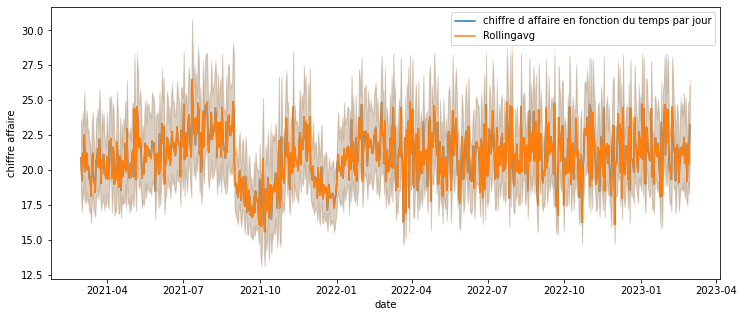

In [59]:
transaction_group[ 'day_rolling_avg' ] = transaction_group.price.rolling(1).mean() 

plt.figure( figsize = ( 12, 5)) 
  
sns.lineplot( x = 'date', 
             y = 'price', 
             data =transaction_group, 
             label = 'chiffre d affaire en fonction du temps par jour') 
  
sns.lineplot( x = 'date', 
             y = 'day_rolling_avg', 
             data = transaction_group, 
             label = 'Rollingavg') 
  
plt.xlabel('date') 
  

  
plt.ylabel('chiffre affaire') 
plt.show()

Ici, ce graphique est plus précis que le précédent, comme on fait la moyenne mobile sur les jours et non sur les mois

### Précisions sur le mois d'octobre 2021

Nous allons voir de plus près le chiffre d'affaire d'octobre

In [60]:
transaction_final.reset_index(inplace=True)

In [61]:
transaction_final['Date/mois'] = transaction_final['date'].dt.to_period('M')

In [62]:
mask = (transaction_final['Date/mois'] == '2021-10')

In [63]:
octobre2021=transaction_final[mask]

In [64]:
oct_ca= (octobre2021[['price','categ']].groupby('categ').count())
oct_ca.rename(columns={'price':'count'}, inplace=True)
oct_ca.sort_values(by='categ', ascending=False).head()

,count
categ,
2,1171
1,1666
0,18762


On voit dans ce group by qu'il n'y a pas eu beaucoup de ventes pour les catégories 1 et 2

In [65]:
oct_ca= (octobre2021[['price','categ']].groupby('categ').sum()*octobre2021[['price','categ']].groupby('categ').count())
oct_ca.sort_values(by='categ', ascending=False).head()

,price
categ,
2,102796926
1,56248025
0,3738344072


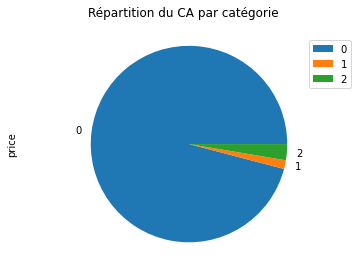

In [66]:
oct_ca.plot(kind = 'pie', subplots = True, title = 'Répartition du CA par catégorie')
plt.axis('equal')
plt.show()

Sur ce piechart on voit clairement que la répartition est inégale et que la catégorie 0 est bien au dessus en octobre 2021.

On va donc analyser l'évolution du chiffre d'affaire de la catégorie 1 dans le temps.

In [67]:
cat1 = transaction_final.query('categ == 1')

In [68]:
cat1_evolution = cat1[['Date/mois','price',]].groupby('Date/mois').sum()*cat1[['Date/mois','price']].groupby('Date/mois').count()
cat1_evolution.sort_values(by='Date/mois', ascending=True).head()

,price
Date/mois,
2021-03,1707822069
2021-04,1183372555
2021-05,1344897794
2021-06,1752397139
2021-07,1728569863


Text(0.5, 1.0, "Evolution du chiffre d'affaire de la catégorie 1 par rapport au temps par mois")

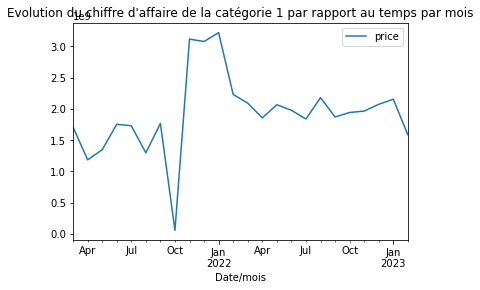

In [69]:
cat1_evolution.plot()
plt.title("Evolution du chiffre d'affaire de la catégorie 1 par rapport au temps par mois")

On voit donc qu’en octobre 2021, Il y’a une grosse baisse du CA, mais celui-ci augmente juste après pour 3.0 et rebaisse encore une fois. Cela peut-être dû à plusieurs choses : 

-Le fait qu’ils n’ont peut-être pas pris en compte les ventes de cette catégorie en octobre 

-Moins de mise en vente de cette catégorie


### La courbe de Lorenz

La courbe de Lorenz est une représentation graphique de la distribution d'une variable(ici le chiffre d'affaire) au sein d'une population(ici les clients)

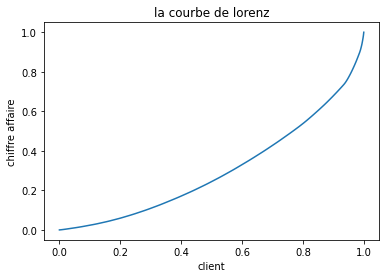

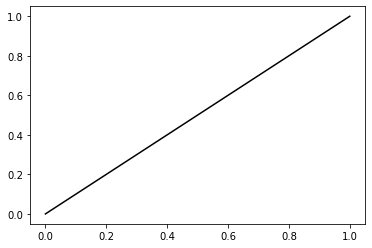

In [70]:
ca=transaction_final['price'].sort_values()
n=len(ca)
lorenz = np.cumsum(np.sort(ca)) / ca.sum()
lorenz = np.append([0],lorenz)# La courbe de Lorenz commence à 0
xaxis=np.linspace(0-1/n,1+1/n,len(lorenz))
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.xlabel("client")
plt.ylabel("chiffre affaire")
plt.title("la courbe de lorenz")
plt.show()
plt.plot([0,1],[0,1],color='k')

Ici on voit que la courbe de Lorenz est différente de la droite qui  fait la diagonale, ce qui montre une inégalité au sein des clients sur le chiffre d'affaire. La personne qui a le salaire médian est située à 0,5 sur l'axe x.

## Demandes de Julie

### Genre du client et la catégorie des livres achetés

Ici pour le test d'indépendence du chi-2, il faut faire le tableau de contingence

In [71]:
X = "sex"
Y = "categ"

cont = transaction_final[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)
cont.head()

categ,0,1,2
sex,,,
f,206103,114899,17283
m,209356,112270,19200


Ici le code affichant la heatmap(carte de chaleur)

<AxesSubplot:xlabel='categ', ylabel='sex'>

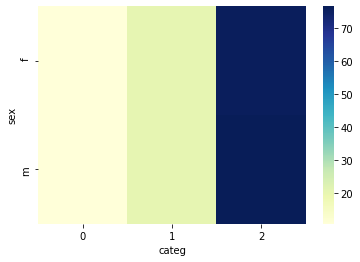

In [72]:
X = "sex"#qualitative
Y = "categ"#qualitative
dt_pivot=transaction_final[["sex","categ","price"]]
# pandas pivot
heatmap1_data = pd.pivot_table(dt_pivot, values='price',
                     index=["sex"], 
                     columns='categ')
sns.heatmap(heatmap1_data, cmap="YlGnBu")

On voit sur cette heatmap qu'il y'a une faible corrélation entre l'âge et la catégorie 0 et 1 mais il y'a une forte corrélation entre la catégorie 2 et le sex

Si on a une p-value inférieur à 5% alors les valeurs ne sont pas indépendantes sinon elles sont dépendantes

In [73]:
from scipy.stats import chi2_contingency
Khi2_obs, p_value, ddl, effectif_theorique = chi2_contingency(cont)
p_value

1.1310980597090762e-32

Les variables ne sont donc pas indépendantes car on a une p-value inférieur à 5%

### Âge des clients et montant total des achats

Avant d'effectuer tout test, il faut vérifier si la normalité entre les 2 variables est vérifiée ou non avec le test de  kolmogorov-smirnov :

-Si la normalité est vérifiée, alors on doit effectuer le test de Pearson : si c'est une valeur positive alors les 2 varaiables vont dans le même sens, sinon elles ne vont pas dans le même sens

-Si la normalité n'est pas vérifiée, alors on doit effectuer le test de Spearman qui est l'équivalent du test de Pearson 

In [74]:
import scipy.stats as st

Text(0.5, 1.0, "le chiffre d'affaire en fonction d'age")

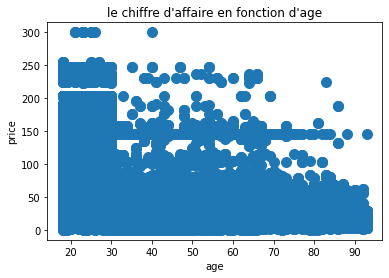

In [75]:
X = "age"#quantitative
Y = "price"#quantitative
transaction_final.plot.scatter(x = 'age', y = 'price', s = 100)
plt.title("le chiffre d'affaire en fonction d'age")

Ici on voit que les jeunes dépensent plus que les personnes agées

##### Test de kolmogorov-smirnov

In [76]:
X = "age" # qualitative
Y= "price" # quantitative
from scipy.stats import kstest
X=transaction_final[X]
Y=transaction_final[Y]
X, pval1 = kstest(X,'norm')

Y, pval2 = kstest(Y,'norm')

print(pval1)

print(pval2)

0.0
0.0


Ici, la p-value est inférieur à 0.05 , donc on ne peut pas utilisé le test de Pearson mais de Spearman.

Donc pour toutes les corrélations à faire avec l'âge se fera avec le test de Spearman car une seule variable qui ne suit pas la loi Normale suffit.

Le coefficient de corrélation de Spearman est le degré de dépendance entre 2 variables quantitatives

In [77]:
list1=transaction_final["age"]
list2=-transaction_final["price"]
st.spearmanr(list1, list2)

SpearmanrResult(correlation=0.054915338071853136, pvalue=0.0)

La p-value est inférieur à 0,05 donc il y'a une corrélation entre l'âge et le prix

In [78]:
age_montant = transaction_final.groupby(['client_id','age'])['price'].sum().reset_index(name="montant_achats_tot")
age_montant.head()

,client_id,age,montant_achats_tot
0,c_1,67,558
1,c_10,66,1354
2,c_100,30,255
3,c_1000,56,2262
4,c_1001,40,1813


Text(0.5, 1.0, "montant total des achats en fonction de l'age")

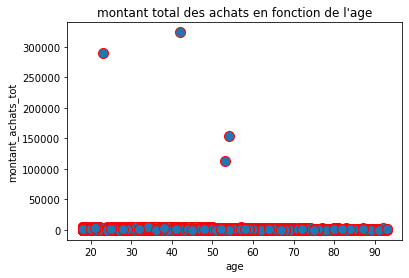

In [79]:
x="age"  #quantitatives
y="montant_achats_tot" #quantitatives
age_montant.plot.scatter(x = 'age', y = "montant_achats_tot",edgecolor='red', s = 100)
plt.title("montant total des achats en fonction de l'age")

Hors-mis les 4 clients qui ont fait des grands achats, le montant total d'achats est stable pour l'age

Comme l'âge ne suit pas la loi Normale, on utilise le test de Spearman

In [80]:
list1=age_montant["montant_achats_tot"]
list2=age_montant["age"]
st.spearmanr(list1, list2) 

SpearmanrResult(correlation=-0.18497826030250145, pvalue=4.6077756608265514e-67)

La p-value est inférieur à 0,05 donc il y'a une corrélation entre les deux variables

### Âge des clients et montant moyen du panier

In [81]:
age_pan = transaction_final.groupby(['client_id','age'])['price'].mean().reset_index(name="panier_moyen")
age_pan.head()

,client_id,age,panier_moyen
0,c_1,67,14
1,c_10,66,23
2,c_100,30,32
3,c_1000,56,18
4,c_1001,40,18


Text(0.5, 1.0, "l'age en fonction du panier moyen")

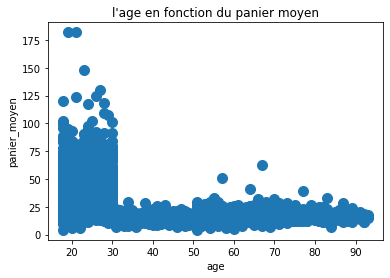

In [82]:
x="age"  #quantitatives
y="panier_moyen" #quantitatives

age_pan.plot.scatter(x = 'age', y= "panier_moyen" , s = 100)
plt.title("l'age en fonction du panier moyen")

Ici, sur ce nuage de points, on peut voir que le panier moyen entre 18 et 30 est élevé (jusqu'à 125 en moyenne) et de 30 à 90 ans le panier moyen est aux alentours de 30 

In [83]:
from scipy.stats import pearsonr 
list1=age_pan["panier_moyen"]
list2=age_pan["age"]
st.spearmanr(list1, list2) 

SpearmanrResult(correlation=-0.32613573988642663, pvalue=2.8805728389199945e-212)

La p-value est inférieur à 0,05 donc il y'a une corrélation entre les deux variables

### Âge des clients et fréquence d'achat

In [84]:
age_freq=transaction_final["client_id"].groupby(transaction_final["age"]).count().reset_index(name="fréquence")
age_freq.head()

,age,fréquence
0,18,15149
1,19,4371
2,20,4584
3,21,4252
4,22,4413


Text(0.5, 1.0, "fréquence d'achat en fonction d'age")

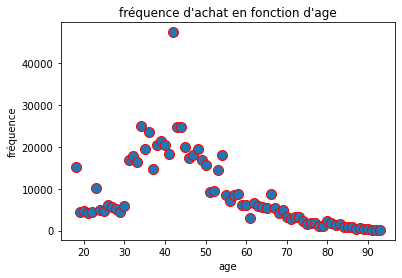

In [85]:
age_freq.plot.scatter(x = 'age', y = "fréquence",edgecolor='red', s = 100)
plt.title("fréquence d'achat en fonction d'age")

On peut voir ici que la fréquence d'achat est élevé entre 30 et 50 ans 

In [86]:
from scipy.stats import pearsonr 
list1=age_freq["fréquence"]
list2=age_freq["age"]
st.spearmanr(list1, list2) 

SpearmanrResult(correlation=-0.6845979808634354, pvalue=9.17297066447968e-12)

La p-value est inférieur à 0,05 donc il y'a une corrélation entre les deux variables

### Âge et catégorie

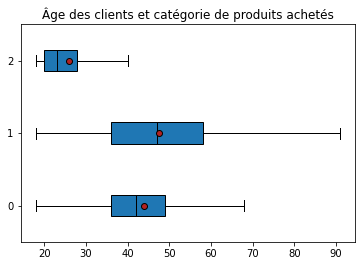

In [87]:
X2 = "categ" # qualitative
Y2= "age" # quantitative

modalites = transaction_final[X2].unique()
groupes = []
for m in modalites:
    groupes.append(transaction_final[transaction_final[X2]==m][Y2])

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes,labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Âge des clients et catégorie de produits achetés")
plt.show()




Sur ce boxplot on voit que la catégorie 1 est plutôt dispersé entre les âges(jeunes ou agés). Cependant en ce qui concerne la catégorie 2 on voit qu'il y'a davantage de jeunes qui achètent sur cette même catégorie

#### Le rapport de corrélation 

Comme l'âge ne suit pas la loi Normale, on va utilisé le test de kruskall-wallis

In [88]:
list1=transaction_final["age"]
list2=transaction_final["categ"]
st.kruskal(list1, list2) 

KruskalResult(statistic=1053898.035431653, pvalue=0.0)

La p-value est inférieur à 0,05 donc il y'a une corrélation entre les deux variables 